In [2]:
import cv2  
import matplotlib.pyplot as plt 
import numpy as np
import torch
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [3]:
from ssd_model import SSD

voc_classes=['aeroplane','bicycle','bird','boat','bottle','bus','car','cat','chair','cow','diningtable','dog','horse','motorbike','person','pottedplant','sheep','sofa','train','tvmonitor']

ssd_cfg={
    'num_classes':21,
    'input_size':300,
    'bbox_aspect_num':[4,6,6,6,4,4],
    'feature_maps':[38,19,10,5,3,1],
    'steps':[8,16,32,64,100,300],
    'min_sizes':[30,60,111,162,213,264],
    'max_sizes':[60,111,162,213,264,315],
    'aspect_ratios':[[2],[2,3],[2,3],[2,3],[2],[2]]
}

net=SSD(phase="inference",cfg=ssd_cfg)

net_weights=torch.load('./weights/ssd300_50.pth',map_location={'cuda:0':'cpu'})

net.load_state_dict(net_weights)

<All keys matched successfully>

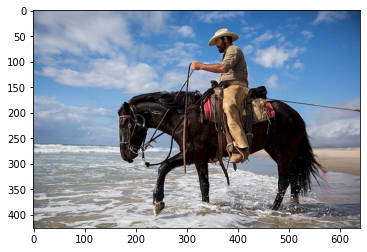

torch.Size([1, 3, 300, 300])
torch.Size([1, 21, 200, 5])
tensor([[[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000]],

         [[0.0259, 0.2567, 0.2270, 0.9161, 0.9261],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000]],

         [[0.0103, 0.7345, 0.7244, 0.8496, 0.9136],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
          

In [19]:
from ssd_model import dataTransform
image_file_path='./data/cowboy-757575_640.jpg'
img=cv2.imread(image_file_path)
height,width,channels=img.shape

plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

color_mean=(104,117,123)
input_size=300
transform=dataTransform(input_size,color_mean)

img_transformed,boxes,labels=transform(img,'val',"","")
img=torch.from_numpy(img_transformed[:,:,(2,1,0)]).permute(2,0,1)

net.eval()

x=img.unsqueeze(0)
print(x.shape)
detections=net(x)
print(detections.shape)
print(detections)


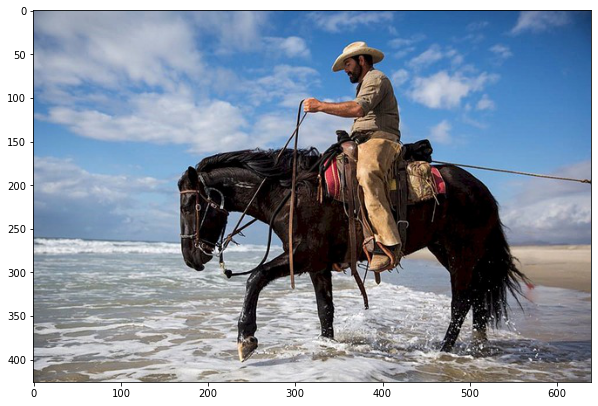

In [20]:
from utils.ssd_predict_show import SSDPredictShow

img_file_path='./data/cowboy-757575_640.jpg'

ssd=SSDPredictShow(eval_categories=voc_classes,net=net)
ssd.show(img_file_path,data_confidence_level=0.6)